# Tweets from @vivino

## Get User Timeline information

In [2]:
import tweepy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from datetime import datetime, date, time
import matplotlib.dates as mdates
import time

In [ ]:
# Get Access for API 1.0
CONSUMER_API_KEY = ''
CONSUMER_API_SECRET = ''
ACCESS_KEY = ''
ACCESS_SECRET = ''

In [ ]:
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [12]:
# Get Access for API 2.0
BEARER_TOKEN = ''

In [13]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

### By API 2.0

In [ ]:
# Getting Id of vivino
vivino = client.get_user(username="vivino")
vivino_id = vivino.data.id
print(vivino_id)

In [ ]:
# Test The results firstly

for tweet in tweets_info.flatten(limit=10):
    print("Tweet_ID: " + str(tweet["id"]))
    print("Created at: " + str(tweet.created_at))
    print("Content: " + tweet.text)
    print(tweet["public_metrics"])

In [ ]:
#Collect the tweets information excluding any 'retweets','replies'
tweet_list = []
for tweets in tweepy.Paginator(client.get_users_tweets,
                              id = vivino_id,
                              exclude = ['retweets','replies'],
                              tweet_fields=["created_at","text","public_metrics"],
        ):
    tweet_list += tweets.data
    


In [ ]:
tweet_id = [tweet.id for tweet in tweet_list]
tweet_created_at = [tweet.creat_at for tweet in tweet_list]
pd.DataFrame({'tweet_id': tweet_id, 'created_at': tweet_created_at})

### By API 1.0

In [ ]:
# Check the code
for tweet in tweepy.Cursor(api.user_timeline, screen_name="vivino",count = 500).items(2):
    print("Created at: " + str(tweet.created_at))
    print("Tweet_ID: " + str(tweet.id_str))
    print("Favourites: " + str(tweet.favorite_count))
    print("Retweets: " + str(tweet.retweet_count))
    print("Content: " + tweet.text) 
    print("---------------------\n")

In [ ]:
# Create list
Created_time = []
Tweet_ID = []
Favourite_counts = []
Retweets_counts = []
Content = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name="vivino").items():

    Time = str(tweet.created_at)
    Created_time.append(Time)
    
    ID = str(tweet.id_str)
    Tweet_ID.append(ID)
    
    
    Favourites = str(tweet.favorite_count)
    Favourite_counts.append(Favourites)
    
    Retweets = str(tweet.retweet_count)
    Retweets_counts.append(Retweets)
    
    Text = tweet.text
    Content.append(Text)

In [ ]:
# Creat the Dataframe for this
vivinoTweets = pd.DataFrame({"tweet_ID": tweet_ID, "created_at": created_at, "content": content, "public_metrics":public_metrics})
vivinoTweets.head()

In [ ]:
# Save as csv
vivinoTweets.to_csv("vivinoTweets_11.01.csv")


## Make the time-series plot

In [4]:
vivinodf = pd.read_csv("vivinoTweets_11.01.csv")

In [5]:
vivinodf['Favourite_counts'] = vivinodf['Favourite_counts'].apply(pd.to_numeric,errors='coerce')
vivinodf['Retweets_counts'] = vivinodf['Retweets_counts'].apply(pd.to_numeric,errors='coerce')

In [6]:
vivinodf['Date'], vivinodf['Drop'] = vivinodf['Created_time'].str.split('+', 1).str
vivinodf['yearMonth'] =vivinodf.Date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))


/var/folders/q7/0qwk7p_s5yd4phd38jj4hwhr0000gn/T/ipykernel_29649/63714623.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  vivinodf['Date'], vivinodf['Drop'] = vivinodf['Created_time'].str.split('+', 1).str


<AxesSubplot:xlabel='yearMonth'>

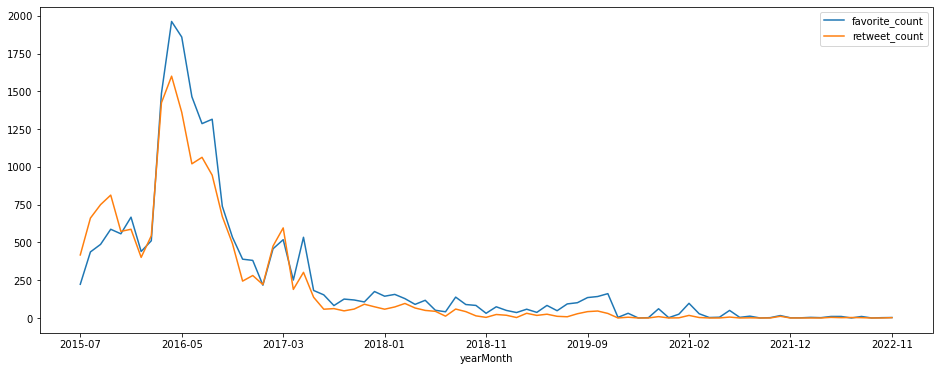

In [109]:
#Calculate the total amounts 
vivinodf_month_df1 = vivinodf.groupby('yearMonth')['Favourite_counts'].sum().reset_index(name='Favourite_counts')
vivinodf_month_df2 = vivinodf.groupby('yearMonth')['Retweets_counts'].sum().reset_index(name='Retweets_counts')

# create time series for data:
tfav = pd.Series(data=vivinodf_month_df1['Favourite_counts'].values, index=vivinodf_month_df1['yearMonth'])
tret = pd.Series(data=vivinodf_month_df2['Retweets_counts'].values, index=vivinodf_month_df2['yearMonth'])

# Likes vs retweets visualization:
%matplotlib inline
tfav.plot(figsize=(16,6), label="favorite_count", legend=True)
tret.plot(figsize=(16,6), label="retweet_count", legend=True)

According to the plot by timeline, it indicates that the highest engagement period for @vivino id during the 2016-2017, this might due to the expansion of the twetter. We tried to trace back to that 'bonus period' and find some tweets text contain the key words as "vivino.com'. However, it requires the academic research access to get those via "Full-archive search". We tried to apply for that access but with bad luck. 

*We choose the key words of "vivino.com", because we found people may post their tweets after they rating from the "vivino.com" web directly. To some extend, it could be considered as a measurment of sales.(It is not perfect, but it is available for us.) 

## Analysis the engaging users

In [7]:
# Read the Data
vivinodf = pd.read_csv("vivinoTweets_11.01.csv")

In [8]:
#Transfer str data to int
vivinodf['Favourite_counts'] = vivinodf['Favourite_counts'].apply(pd.to_numeric,errors='coerce')
vivinodf['Retweets_counts'] = vivinodf['Retweets_counts'].apply(pd.to_numeric,errors='coerce')

# Sort the Data by Favourite_counts'
vivinodf = vivinodf.sort_values(by=['Favourite_counts'])

In [9]:
vivinodf = vivinodf.sort_values(by=['Favourite_counts'],ascending=False)
vivinodf.head()

,Unnamed: 0,Created_time,Tweet_ID,Favourite_counts,Retweets_counts,Content
2692,2692,2015-12-26 03:52:06+00:00,680596923552772097,123,60,WOW! Thank you for using Vivino. https://t.co/...
1661,1661,2016-07-22 14:05:04+00:00,756490247505006592,87,54,Portrait of a #winelover after a very long wee...
478,478,2018-08-14 01:07:05+00:00,1029172522602909699,79,21,Let’s pop some bottles to celebrate 100 millio...
196,196,2019-07-25 00:59:18+00:00,1154194381047398400,75,3,Looks like @DwyaneWade has a new signature mov...
595,595,2017-12-26 21:58:57+00:00,945775968106532866,71,10,We saw a record 2.2 million scans on Christmas...


In [10]:
#Keep the 100th which have the most fovorite counts
vivinodf_fav = vivinodf[:100]
ids = vivinodf_fav['Tweet_ID'].tolist()

We generate a list of those Tweet_IDs as the identification in order to find all of those users. However, due to the limits restriction, we can only use the single id to search. So we choose the top 5 favoriate list and then combine them together.

In [29]:
# Find the Liking Users identified by tweet id

liking_user = tweepy.Paginator(client.get_liking_users,
                              id= '680596923552772097',
                              user_fields = ['id','location','name'],
                              max_results = 100)
    
    

In [30]:
user_ID =[]
location = []
name = []

for user in liking_user.flatten():
        
        id = str(user["id"])
        user_ID.append(id)
    
        loc = str(user["location"])
        location.append(loc)
    
        na = str(user["name"])
        name.append(na)
    

In [32]:
fav_1 = pd.DataFrame({"user_ID":user_ID,"location": location,"name": name})
len(fav_1)

115

In [40]:
#Repeat the process for five times
user_ID =[]
location = []
name = []

liking_user2 = tweepy.Paginator(client.get_liking_users,
                              id= '756490247505006592',
                              user_fields = ['id','location','name'],
                              max_results = 80)

for user in liking_user2.flatten():
        
        id = str(user["id"])
        user_ID.append(id)
    
        loc = str(user["location"])
        location.append(loc)
    
        na = str(user["name"])
        name.append(na)

fav_2 = pd.DataFrame({"user_ID":user_ID,"location": location,"name": name})
len(fav_2)

80

In [41]:

user_ID =[]
location = []
name = []

liking_user3 = tweepy.Paginator(client.get_liking_users,
                              id= '1029172522602909699',
                              user_fields = ['id','location','name'],
                              max_results = 80)

for user in liking_user3.flatten():
        
        id = str(user["id"])
        user_ID.append(id)
    
        loc = str(user["location"])
        location.append(loc)
    
        na = str(user["name"])
        name.append(na)

fav_3 = pd.DataFrame({"user_ID":user_ID,"location": location,"name": name})
len(fav_3)

75

In [42]:
user_ID =[]
location = []
name = []

liking_user4 = tweepy.Paginator(client.get_liking_users,
                              id= '1154194381047398400',
                              user_fields = ['id','location','name'],
                              max_results = 80)

for user in liking_user4.flatten():
        
        id = str(user["id"])
        user_ID.append(id)
    
        loc = str(user["location"])
        location.append(loc)
    
        na = str(user["name"])
        name.append(na)

fav_4 = pd.DataFrame({"user_ID":user_ID,"location": location,"name": name})
len(fav_4)

66

In [43]:
user_ID =[]
location = []
name = []

liking_user5 = tweepy.Paginator(client.get_liking_users,
                              id= '945775968106532866',
                              user_fields = ['id','location','name'],
                              max_results = 80)

for user in liking_user5.flatten():
        
        id = str(user["id"])
        user_ID.append(id)
    
        loc = str(user["location"])
        location.append(loc)
    
        na = str(user["name"])
        name.append(na)

fav_5 = pd.DataFrame({"user_ID":user_ID,"location": location,"name": name})
len(fav_5)

66

In [46]:
# Merge together
fav_users = pd.concat([fav_1,fav_2,fav_3,fav_4,fav_5])
fav_users.to_csv("likingUsers")

In [49]:
len(fav_users)

402

In [52]:
fav_users1 = fav_users.drop_duplicates()
len(fav_users1)

389

### Explore the location of the liking users

In [73]:
fav_users_loc['count'] = pd.DataFrame(fav_users1.groupby('location')['location'].count())
fav_users_loc = fav_users_loc[fav_users_loc['count'] >= 5]
fav_users_loc

,location,count
location,,
"London, England",5,5
None,87,87
"San Francisco, CA",5,5


Here, we try to identify the most popular regions for those liking users. However, their location name are too different. We cannot explore through this way. But at a galance, the USA, UK, CA, and FR could be considered as the most popular countries.

## Collecting the tweets information of past seven days

In [14]:

tweets = tweepy.Paginator(client.search_recent_tweets,
                              query="vivino.com -is:retweet",
                              tweet_fields=["created_at","lang","geo"],
                              expansions=['author_id'],
                              max_results=100)

created_time = []
language = []
content = []
user_name = []
location = []

for page in tweets:
    page_users = {user.id: user for user in page.includes['users']} # We create a dictionary indexed by the user id to easily retrieve the full user object of each tweet
    for tweet in page.data:
        
        ct = str(tweet.created_at)
        created_time.append(ct)
        
        lang = str(tweet.lang)
        language.append(lang)
        
        loc = str(tweet.geo)
        location.append(loc)
        
        text = tweet.text
        content.append(text)
        
        name = page_users[tweet.author_id].name
        user_name.append(name)
        
        

In [15]:
tweets = pd.DataFrame({"created_time": created_time, "language": language, "content": content, "user_name":user_name,"location": location})
tweets.tail()

,created_time,language,content,user_name,location
365,2022-10-28 13:50:25+00:00,ja,サラッコモスカートダスティのグラッパ！\n香りアロマを高く感じるね。 https://t.c...,kioske,None
366,2022-10-28 11:58:46+00:00,ja,スパイス。おだやかなタンニン。黒果実。ミント。バランス。もう少し熟成してもいいかも。。Win...,kioske,None
367,2022-10-28 11:33:54+00:00,es,Maceración carbónica 😗👌.Wine en Ortega Ezquerr...,Celia G.-,None
368,2022-10-28 11:08:00+00:00,ja,酸味勝ち。軽くて飲みやすいです。。Wine の @carolinawines。Vivinoで...,えりすこ,None
369,2022-10-28 09:58:49+00:00,ja,すごい香りがイイ\n\nCielo e TerraのワインをVivinoアプリでスキャンしま...,かぴおか,None


### Find the regions of them

In [22]:
tweets_reg = pd.DataFrame(tweets.groupby('language')['language'].count())
tweets_reg ['count'] = pd.DataFrame(tweets.groupby('language')['language'].count())


In [53]:
tweets_reg.sort_values(by ='count', ascending = False).head()
tweets_reg.to_csv("tweets_reg.csv")

/Users/zhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


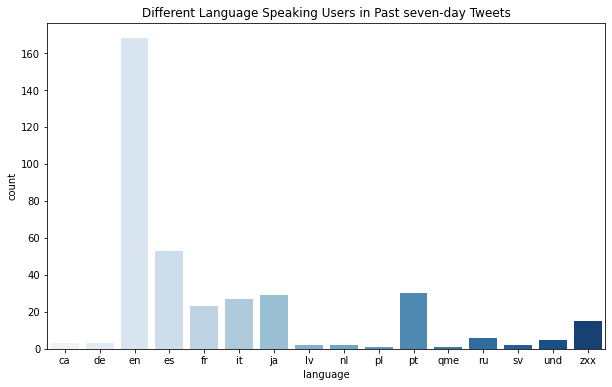

In [55]:
plt.figure(figsize=(10, 6))
p = sns.barplot(tweets_reg.index, tweets_reg['count'], data = tweets_reg, palette = "Blues")
p.set_title("Different Language Speaking Users in Past seven-day Tweets")
plt.show()

In [26]:
sns.barplot?

According to the result, people in English-speaking, Spaish-speaking, Portuguese-speaking, Italian-speaking, and the Japanese-speaking contries are most likely to use the e-commercial web of vivino.com.

# Google Trend Data

Since the data limits for the past information, we will use the google trend of 'search volume' as another indicator to see whether there was relationship between the engagement of tweets and the potential sales volume. 

Also, based on the current information, we will choose the country of "US","CA", "UK", "PT", and "IT".

In [90]:
from pytrends.request import TrendReq 

In [92]:
pytrend = TrendReq()
colnames = ["keywords"]

dataset = []
for geo_code in ['US','CA','GB','PT','IT']:
        keywords = ['vivino']
        pytrend.build_payload(
        kw_list=keywords,
        cat=0,
        timeframe='2016-01-01 2016-12-31',
        geo=geo_code)
        data = pytrend.interest_over_time()
        if not data.empty:
            data = data.drop(labels=['isPartial'],axis='columns')
            data['geo']=geo_code
            dataset.append(data)
            
dataset

[            vivino geo
 date                  
 2016-01-03      41  US
 2016-01-10      64  US
 2016-01-17      52  US
 2016-01-24      63  US
 2016-01-31      48  US
 2016-02-07      50  US
 2016-02-14      57  US
 2016-02-21      67  US
 2016-02-28      68  US
 2016-03-06      41  US
 2016-03-13      27  US
 2016-03-20      49  US
 2016-03-27      50  US
 2016-04-03      41  US
 2016-04-10      31  US
 2016-04-17      46  US
 2016-04-24      50  US
 2016-05-01      50  US
 2016-05-08      24  US
 2016-05-15      43  US
 2016-05-22      48  US
 2016-05-29      41  US
 2016-06-05      36  US
 2016-06-12      44  US
 2016-06-19      38  US
 2016-06-26      62  US
 2016-07-03      32  US
 2016-07-10      42  US
 2016-07-17      53  US
 2016-07-24      46  US
 2016-07-31      58  US
 2016-08-07      34  US
 2016-08-14      33  US
 2016-08-21      53  US
 2016-08-28      58  US
 2016-09-04      51  US
 2016-09-11      31  US
 2016-09-18      43  US
 2016-09-25      52  US
 2016-10-02     

In [94]:
vivino2016 = pd.concat(dataset, axis=1)
vivino2016.to_csv("vivino2016-google.csv")

In [129]:
vivinopast = pd.read_csv("vivino2016-google.csv")

In [130]:
vivinopast.head()

,date,vivino,geo,vivino.1,geo.1,vivino.2,geo.2,vivino.3,geo.3,vivino.4,geo.4
0,2016-01-03,41,US,25,CA,40,GB,38,PT,82,IT
1,2016-01-10,64,US,30,CA,35,GB,21,PT,49,IT
2,2016-01-17,52,US,48,CA,0,GB,45,PT,22,IT
3,2016-01-24,63,US,52,CA,45,GB,17,PT,64,IT
4,2016-01-31,48,US,0,CA,37,GB,0,PT,41,IT


In [131]:
len(vivinopast)

52

In [132]:
vivinopast['Total'] = vivinopast ['vivino'] + vivinopast ['vivino.1']+vivinopast ['vivino.2'] +vivinopast ['vivino.3'] +vivinopast ['vivino.4']

Since we would like to merge this dataset with the vivino tweets, we will need to identify both dataset by Yearweek.

## Merge Data together to see the trends

In [133]:
# identify the week in the year for google trend dataset
vivinopast['date'] = pd.to_datetime(vivinopast['date'])
vivinopast_week=vivinopast.set_index('date')
vivinopast_week['week'] = pd.DataFrame(vivinopast_week.index.isocalendar().week)
vivinopast_week['Year'] = 2016
vivinopast_week['Yearweek'] = vivinopast_week['Year'].astype(str).str.cat(vivinopast_week['week'].astype(str), sep = '-')
vivinopast_week

,vivino,geo,vivino.1,geo.1,vivino.2,geo.2,vivino.3,geo.3,vivino.4,geo.4,Total,week,Year,Yearweek
date,,,,,,,,,,,,,,
2016-01-03,41,US,25,CA,40,GB,38,PT,82,IT,226,53,2016,2016-53
2016-01-10,64,US,30,CA,35,GB,21,PT,49,IT,199,1,2016,2016-1
2016-01-17,52,US,48,CA,0,GB,45,PT,22,IT,167,2,2016,2016-2
2016-01-24,63,US,52,CA,45,GB,17,PT,64,IT,241,3,2016,2016-3
2016-01-31,48,US,0,CA,37,GB,0,PT,41,IT,126,4,2016,2016-4
2016-02-07,50,US,0,CA,25,GB,18,PT,87,IT,180,5,2016,2016-5
2016-02-14,57,US,23,CA,87,GB,28,PT,59,IT,254,6,2016,2016-6
2016-02-21,67,US,0,CA,37,GB,28,PT,70,IT,202,7,2016,2016-7
2016-02-28,68,US,22,CA,0,GB,0,PT,43,IT,133,8,2016,2016-8


In [122]:
# identify the week in the year for @vivino tweets account
vivinodf = vivinodf.sort_values(by='Created_time')
vivinodf['Dateymd'] =vivinodf.Date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
vivinodf['Dateymd'] = pd.to_datetime(vivinodf['Dateymd'])

#find week
vivinodf_week=vivinodf.set_index('Dateymd')
vivinodf_week['week'] = pd.DataFrame(vivinodf_week.index.isocalendar().week)

#find year
vivinodf_week['Year'] = vivinodf_week.Date.apply(lambda x: pd.to_datetime(x).strftime('%Y'))

#combine together
vivinodf_week['Yearweek'] = vivinodf_week['Year'].astype(str).str.cat(vivinodf_week['week'].astype(str), sep = '-')

#combine by 'Yearweek'
vivinodf_w=vivinodf_week.groupby('Yearweek')[['Favourite_counts','Retweets_counts']].sum().reset_index()
vivinodf_w.head()

,Yearweek,Favourite_counts,Retweets_counts
0,2015-29,18,18
1,2015-30,126,254
2,2015-31,118,194
3,2015-32,78,94
4,2015-33,26,28


In [135]:
# Merge two dataset
combinenew_df = pd.merge(vivinopast_week,vivinodf_w, how = 'inner', on = 'Yearweek')
combinenew_df.drop(combinenew_df.columns[0:10],axis = 1).head()

,Total,week,Year,Yearweek,Favourite_counts,Retweets_counts
0,199,1,2016,2016-1,40,50
1,167,2,2016,2016-2,185,115
2,241,3,2016,2016-3,114,103
3,126,4,2016,2016-4,101,133
4,180,5,2016,2016-5,58,66


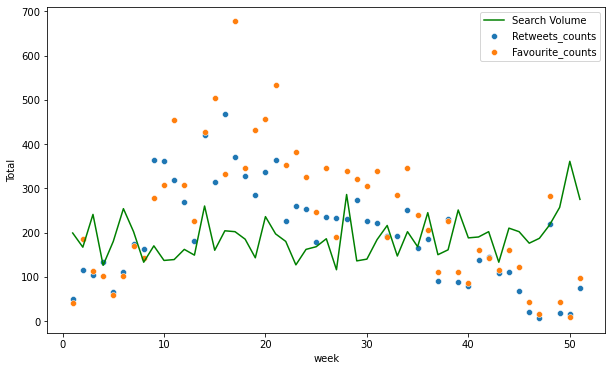

In [139]:
plt.figure(figsize=(10, 6))
sns.lineplot( x = 'week',
                 y = 'Total',
                 data = combinenew_df,
                 label = 'Search Volume', color = 'green')
sns.scatterplot( x = 'week',
                 y = 'Retweets_counts',
                 data = combinenew_df,
                 label = 'Retweets_counts')
sns.scatterplot( x = 'week',
                 y = 'Favourite_counts',
                 data = combinenew_df,
                 label = 'Favourite_counts')
plt.show()

## Regression Analysis

In [140]:
X = combinenew_df[['Retweets_counts','Favourite_counts']]
Y = combinenew_df.Total
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.355
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.268
Time:                        01:07:58   Log-Likelihood:                -268.37
No. Observations:                  51   AIC:                             542.7
Df Residuals:                      48   BIC:                             548.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              209.2875     13.771  